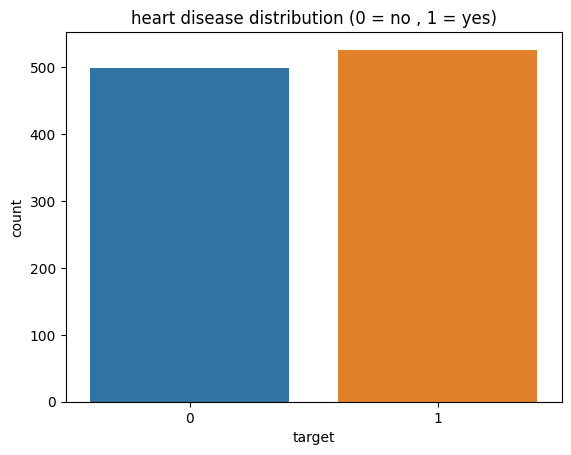

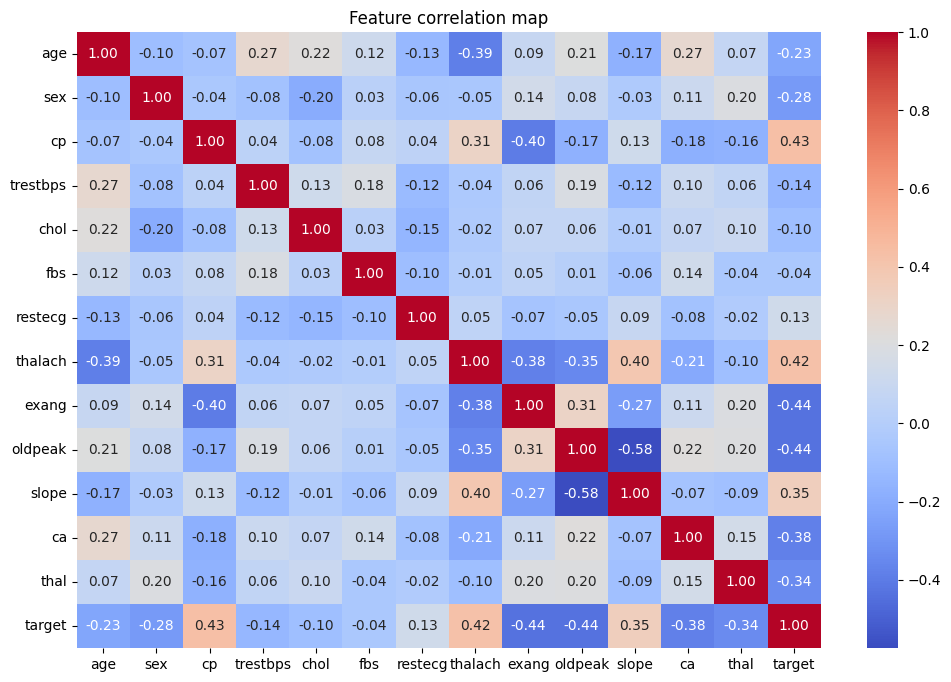

accuracy of logistic regression:  0.7951219512195122
classification report :                precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

accuracy of rumfy:  0.9853658536585366
classification report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

accuracy of xgboost :  0.9853658536585366
classificatio report :               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.9

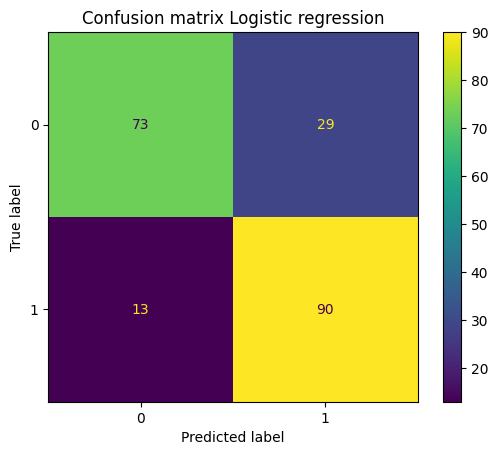

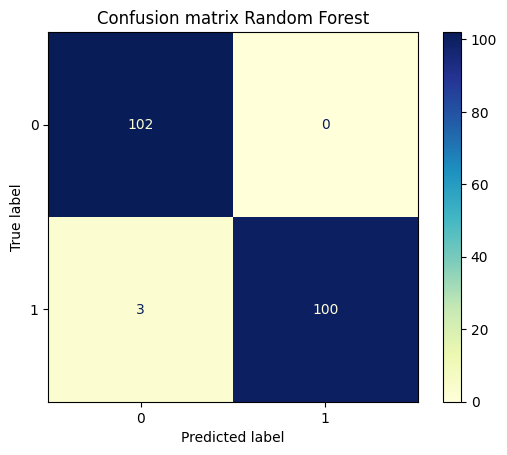

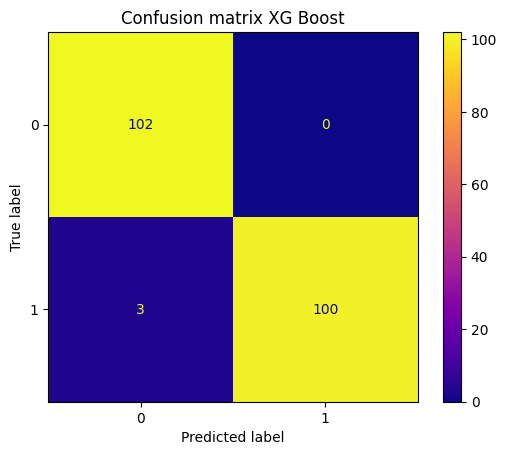

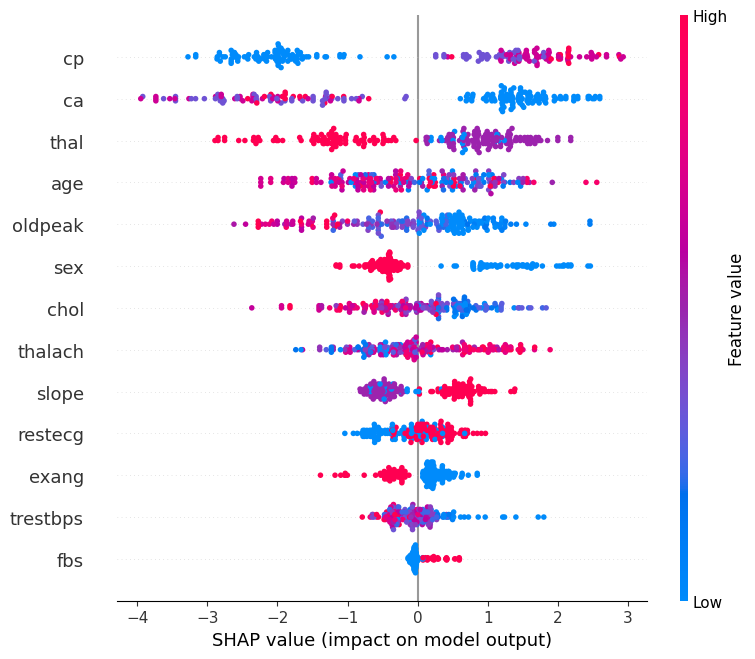

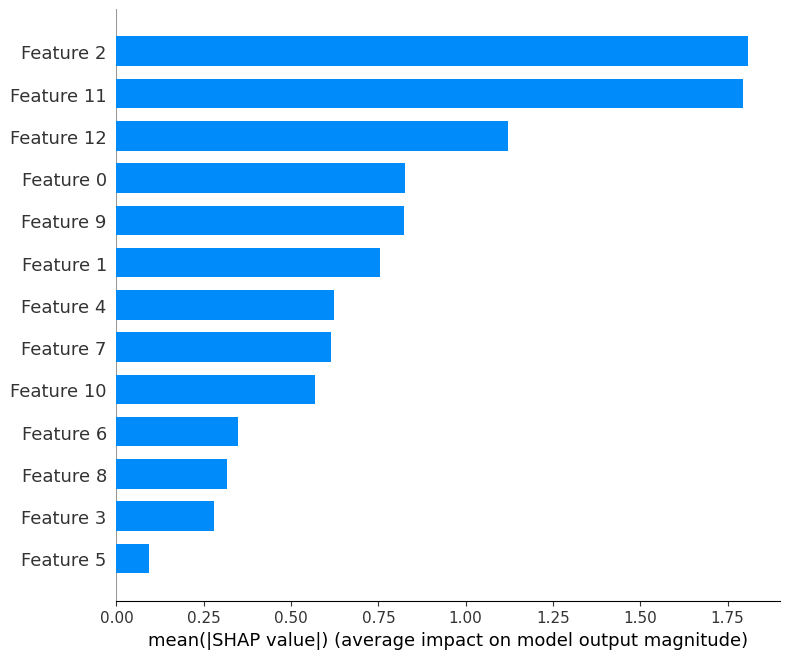

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hd = pd.read_csv("heart.csv")

#print("shape = ",hd.shape)
#print("missing values : ",hd.isnull().sum())

# count plot
sns.countplot(data = hd , x = 'target')
plt.title("heart disease distribution (0 = no , 1 = yes)")
plt.show()

# heatmap
plt.figure(figsize = (12,8))
sns.heatmap(hd.corr() , annot = True , cmap  = 'coolwarm' , fmt = '.2f')
plt.title("Feature correlation map")
plt.show()

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = hd.drop("target" , axis = 1)
y  = hd["target"]
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size  = 0.2 , random_state  =42)

#creating standard sclar of mean = 0 , standard deviation  = 1
scaler = StandardScaler()
x_train   = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# model training
# 1) logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , ConfusionMatrixDisplay
lr1 = LogisticRegression()
lr1.fit(x_train , y_train)
prediction = lr1.predict(x_test)
print("accuracy of logistic regression: ", accuracy_score(y_test, prediction))
print("classification report : ", classification_report(y_test, prediction))

# 2) Random Forest
from sklearn.ensemble import RandomForestClassifier
rumfy = RandomForestClassifier()
rumfy.fit(x_train , y_train)
predictions = rumfy.predict(x_test)
print("accuracy of rumfy: ", accuracy_score(y_test,predictions))
print("classification report:", classification_report(y_test, predictions))


# 3) XG Boost
from xgboost import XGBClassifier
yuji = XGBClassifier( eval_metric = 'logloss')
yuji.fit(x_train, y_train)
y_pred = yuji.predict(x_test)
print("accuracy of xgboost : ", accuracy_score(y_test, y_pred))
print("classificatio report :", classification_report(y_test, y_pred))



cm1 = confusion_matrix(y_test , prediction )
disp1 = ConfusionMatrixDisplay(confusion_matrix  = cm1 , display_labels = [0,1])
disp1.plot(cmap = 'viridis')
plt.title("Confusion matrix Logistic regression")
plt.show()

cm2 = confusion_matrix(y_test , predictions )
disp2 = ConfusionMatrixDisplay(confusion_matrix  = cm2 , display_labels = [0,1])
disp2.plot(cmap = 'YlGnBu')
plt.title("Confusion matrix Random Forest")
plt.show()

cm3 = confusion_matrix(y_test , y_pred )
disp3 = ConfusionMatrixDisplay(confusion_matrix  = cm3 , display_labels = [0,1])
disp3.plot(cmap = 'plasma')
plt.title("Confusion matrix XG Boost")
plt.show()




feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

x_test_df = pd.DataFrame(x_test, columns=feature_names)

# using shap
import shap
explainer = shap.TreeExplainer(yuji)
shap_values = explainer.shap_values(x_test_df)
shap.summary_plot(shap_values, x_test_df)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0] , x_test_df.iloc[0])
shap.summary_plot(shap_values , x_test , plot_type = 'bar')






